In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Convolution2D as conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, ZeroPadding2D

from keras import metrics
from keras import backend as K

%matplotlib inline

Using MXNet backend


In [2]:
# FORMATOS 

if K.image_data_format() == 'channels_first':
    data_format = 'channels_first' #Para MXNET
    input_shape = (1,28,28)
    #input_shape = (3,32,32)
else:
    data_format = 'channels_last' #Para TensorFlow
    input_shape = (28,28,1)


In [3]:
print(K.image_data_format())

channels_first


In [4]:
#ARQUITECTURA RED 
#SECUENCIAL DENTRO DE UNA FUNCION
"""
Los parametros de las capas conv2d y Maxpool y las fully-connected son tomadas del siguiente articulo 
https://arxiv.org/pdf/1409.1556v6.pdf. Articulo original.
"""


def VGG16():
    
    padding = 'same'
    activ1 = 'relu'
        
    model = Sequential()
    
    # 1-BLOQUE
    # Layer1
    model.add(conv2D(filters = 64,
                    kernel_size=(3,3),
                    strides = (1,1),
                    padding = padding,
                    data_format = data_format,
                    activation = activ1,
                    name = 'l1Conv2D',
                    input_shape = input_shape))
    model.add(BatchNormalization(axis=1))
    # Layer2
    
    model.add(conv2D(filters = 64,
                    kernel_size=(3,3),
                    strides = (1,1),
                    padding = padding,
                    data_format = data_format,
                    activation = activ1,
                    name = 'l2Conv2D'))
    model.add(BatchNormalization(axis=1))
    
    # Layer3
    model.add(MaxPooling2D(pool_size=(2, 2),
                           strides = 2,
                           padding= padding,
                           data_format=data_format,
                           name = 'l3Maxpool2D'))
    
    # 2-BLOQUE
    # Layer4
    
    model.add(conv2D(filters = 128,
                    kernel_size=(3,3),
                    strides = (1,1),
                    padding = padding,
                    data_format = data_format,
                    activation = activ1,
                    name = 'l4Conv2D'))
    model.add(BatchNormalization(axis=1))
    # Layer5
    
    model.add(conv2D(filters = 128,
                    kernel_size=(3,3),
                    strides = (1,1),
                    padding = padding,
                    data_format = data_format,
                    activation = activ1,
                    name = 'l5Conv2D'))
    model.add(BatchNormalization(axis=1))
    
    # Layer6
    model.add(MaxPooling2D(pool_size=(2, 2),
                           strides = 2,
                           padding= padding,
                           data_format=data_format,
                           name = 'l6Maxpool2D'))
    
    # 3-BLOQUE
    # Layer7
    
    model.add(conv2D(filters = 256,
                    kernel_size=(3,3),
                    strides = (1,1),
                    padding = padding,
                    data_format = data_format,
                    activation = activ1,
                    name = 'l7Conv2D'))
    model.add(BatchNormalization(axis=1))
    
    # Layer8
    model.add(conv2D(filters = 256,
                    kernel_size=(3,3),
                    strides = (1,1),
                    padding = padding,
                    data_format = data_format,
                    activation = activ1,
                    name = 'l8Conv2D'))
    model.add(BatchNormalization(axis=1))
    # Layer9
    
    model.add(conv2D(filters = 256,
                    kernel_size=(3,3),
                    strides = (1,1),
                    padding = padding,
                    data_format = data_format,
                    activation = activ1,
                    name = 'l9Conv2D'))
    model.add(BatchNormalization(axis=1))
    
    # Layer10
    model.add(MaxPooling2D(pool_size=(2, 2),
                           strides = 2,
                           padding= padding,
                           data_format=data_format,
                           name = 'l10Maxpool2D'))
    
    # 4-BLOQUE
    # Layer11
    
    model.add(conv2D(filters = 512,
                    kernel_size=(3,3),
                    strides = (1,1),
                    padding = padding,
                    data_format = data_format,
                    activation = activ1,
                    name = 'l11Conv2D'))
    model.add(BatchNormalization(axis=1))
    
    # Layer12
    model.add(conv2D(filters = 512,
                    kernel_size=(3,3),
                    strides = (1,1),
                    padding = padding,
                    data_format = data_format,
                    activation = activ1,
                    name = 'l12Conv2D'))
    model.add(BatchNormalization(axis=1))
    # Layer13
    
    model.add(conv2D(filters = 512,
                    kernel_size=(3,3),
                    strides = (1,1),
                    padding = padding,
                    data_format = data_format,
                    activation = activ1,
                    name = 'l13Conv2D'))
    model.add(BatchNormalization(axis=1))
    # Layer14
    model.add(MaxPooling2D(pool_size=(2, 2),
                           strides = 2,
                           padding= padding,
                           data_format=data_format,
                           name = 'l14Maxpool2D'))
    
    # 5-BLOQUE
    # Layer15
    
    model.add(conv2D(filters = 512,
                    kernel_size=(3,3),
                    strides = (1,1),
                    padding = padding,
                    data_format = data_format,
                    activation = activ1,
                    name = 'l15Conv2D'))
    model.add(BatchNormalization(axis=1))
    # Layer16
    
    model.add(conv2D(filters = 512,
                    kernel_size=(3,3),
                    strides = (1,1),
                    padding = padding,
                    data_format = data_format,
                    activation = activ1,
                    name = 'l16Conv2D'))
    model.add(BatchNormalization(axis=1))
    # Layer17
    
    model.add(conv2D(filters = 512,
                    kernel_size=(3,3),
                    strides = (1,1),
                    padding = padding,
                    data_format = data_format,
                    activation = activ1,
                    name = 'l17Conv2D'))
    model.add(BatchNormalization(axis=1))
    # Layer18
    model.add(MaxPooling2D(pool_size=(2, 2),
                           strides = 2,
                           padding= padding,
                           data_format=data_format,
                           name = 'l18Maxpool2D'))
    
    model.add(Flatten())
    model.add(Dense(units = 4096, activation = activ1))
    model.add(Dropout(0.5))
    model.add(Dense(units = 4096, activation = activ1))
    model.add(Dropout(0.5))
    model.add(Dense(units = 10, activation = 'softmax'))
    
    
    return model    


In [5]:
# Se carga el modelo (Red neuronal)
model = VGG16()

In [6]:
from keras.datasets import mnist

In [7]:
# los datos para el entrenamiento y el test

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [9]:
"""
x_train2 = x_train[0:1000,:,:]
x_test2 = x_test[0:1000,:,:]
y_train2 = y_train[0:1000]
y_test2 = y_test[0:1000]
"""


x_train2 = x_train
x_test2 = x_test
y_train2 = y_train
y_test2 = y_test


In [14]:
#Esta linea es usada para redimensionar las imagenes

"""
import cv2

import time

#imag_filas, imag_columnas, channel = 224, 224, 3
imag_filas, imag_columnas, channel = 28, 28, 3

#data_rescalado = []



def resize_data(data):
    #data_rescalado = np.zeros((data.shape[0], imag_filas, imag_columnas, channel))
    data_rescalado = np.zeros((data.shape[0], channel , imag_filas, imag_columnas))
    #data_rescalado = np.zeros((imag_filas, imag_columnas, channel))
    for j in range(channel):
        for i, img in enumerate(data):
            #print(img.shape)
            large_img = cv2.resize(img, dsize=(imag_filas, imag_columnas), interpolation=cv2.INTER_CUBIC)
            data_rescalado[i,j,:,:] = large_img

    return data_rescalado
    #return large_img

star_time = time.time()    

x_train_resized = resize_data(x_train2)  
x_test_resized = resize_data(x_test2)  
#y_train_resized = resize_data(y_train2)  
#y_train_resized = y_train2  
#y_test_resized = resize_data(y_test2)  
#y_test_resized = y_test2  
end_time = time.time()
print("tiempo de computo %f [s]"%(end_time-star_time))
"""

x_train_resized = x_train2
x_test_resized = x_test2



x_train_resized = x_train_resized/255.
x_test_resized = x_test_resized/255.


In [15]:
#data_rescalado = np.zeros((x_train2.shape[0], imag_filas, imag_columnas, channel))
#data_rescalado = np.zeros((x_train2.shape[0], imag_filas, imag_columnas))

In [17]:
# re-dimensionar mnist

#dimension imagenes de entrada
#img_filas, img_columnas, channel = 224, 224, 3
img_filas, img_columnas, channel = 28, 28, 1

if K.image_data_format() == 'channels_first':
    X_train = x_train_resized.reshape(x_train_resized.shape[0], channel, img_filas, img_columnas)
    X_test = x_test_resized.reshape(x_test_resized.shape[0], channel, img_filas, img_columnas)
    #input_shape = (channel, img_filas, img_columnas)
else:
    X_train = x_train_resized.reshape(x_train_resized.shape[0], img_filas, img_columnas, channel)
    X_test = x_test_resized.reshape(x_test_resized.shape[0], img_filas, img_columnas, channel)
    #input_shape = (img_filas, img_columnas, channel)

In [18]:
from keras.utils.np_utils import to_categorical

#Convierte el y_train y y_test en numeros binarios para la comparacion


Y_train = to_categorical(y_train2, num_classes = 10)
Y_test = to_categorical(y_test2, num_classes = 10)

In [21]:
#compilar las neuronas 
from keras.losses import categorical_crossentropy
from keras.optimizers import adam

# Cuando se esta corriendo el GPU
# Como se tienen dos GPUS se agrega la siguiente linea
gpu_list = ["gpu(0)", "gpu(1)"]
adam = adam(lr=0.0001)


#model.compile(optimizer= 'adadelta', loss = 'binary_crossentropy', metrics=['accuracy','mae'])
#model.compile(optimizer= 'adadelta', loss = 'categorical_crossentropy', metrics=['accuracy','mae'])
model.compile(optimizer= 'adadelta', loss = 'categorical_crossentropy', metrics=['accuracy','mae'], context=gpu_list)
#model.compile(optimizer= 'adadelta', loss = 'categorical_crossentropy', metrics=['accuracy','mae'])

In [22]:
import time

time_star2 = time.time()

#model.fit(x=X_train, y=Y_train, batch_size =500, epochs=10, shuffle=True)

history = model.fit(x=X_train, 
                    y=Y_train, 
                    batch_size =500, 
                    epochs=5, 
                    validation_data=(X_test, Y_test), 
                    shuffle=True, verbose=1 )


time_end2 = time.time()
print("tiempo de computo %f [s]"%(time_end2-time_star2))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5


/usr/local/lib/python3.5/dist-packages/mxnet/module/bucketing_module.py:408: UserWarning: Optimizer created manually outside Module but rescale_grad is not normalized to 1.0/batch_size/num_workers (1.0 vs. 0.002). Is this intended?
  force_init=force_init)


60000/60000 [==============================] - 46s 768us/step - loss: 1.2995 - acc: 0.5683 - mean_absolute_error: 0.1015 - val_loss: 2.5467 - val_acc: 0.0974 - val_mean_absolute_error: 0.1802
Epoch 2/5
60000/60000 [==============================] - 34s 570us/step - loss: 0.2726 - acc: 0.9328 - mean_absolute_error: 0.0197 - val_loss: 3.5363 - val_acc: 0.0982 - val_mean_absolute_error: 0.1766
Epoch 3/5
60000/60000 [==============================] - 34s 571us/step - loss: 0.1724 - acc: 0.9587 - mean_absolute_error: 0.0119 - val_loss: 4.1333 - val_acc: 0.5332 - val_mean_absolute_error: 0.0943
Epoch 4/5
60000/60000 [==============================] - 34s 571us/step - loss: 0.0571 - acc: 0.9851 - mean_absolute_error: 0.0046 - val_loss: 0.0887 - val_acc: 0.9780 - val_mean_absolute_error: 0.0061
Epoch 5/5
60000/60000 [==============================] - 34s 572us/step - loss: 0.0592 - acc: 0.9859 - mean_absolute_error: 0.0041 - val_loss: 0.0820 - val_acc: 0.9810 - val_mean_absolute_error: 0.0044


In [23]:
score = model.evaluate(X_test, Y_test, batch_size=500)

10000/10000 [==============================] - 2s 161us/step


In [24]:
print(score)

[0.0820176248671487, 0.9809999972581863, 0.00440892712213099]


In [26]:
model.save("model_VGG16_mnist_adadelta_mxnet.h5")

'\nplt.figure(0)  \nplt.plot(history.history[\'acc\'],\'r\')  \nplt.plot(history.history[\'val_acc\'],\'g\')  \nplt.xticks(np.arange(0, 11, 2.0))  \nplt.rcParams[\'figure.figsize\'] = (8, 6)  \nplt.xlabel("Num of Epochs")  \nplt.ylabel("Accuracy")  \nplt.title("Training Accuracy vs Validation Accuracy")  \nplt.legend([\'train\',\'validation\'])\n\n\nplt.figure(1)  \nplt.plot(history.history[\'loss\'],\'r\')  \nplt.plot(history.history[\'val_loss\'],\'g\')  \nplt.xticks(np.arange(0, 11, 2.0))  \nplt.rcParams[\'figure.figsize\'] = (8, 6)  \nplt.xlabel("Num of Epochs")  \nplt.ylabel("Loss")  \nplt.title("Training Loss vs Validation Loss")  \nplt.legend([\'train\',\'validation\'])\n'

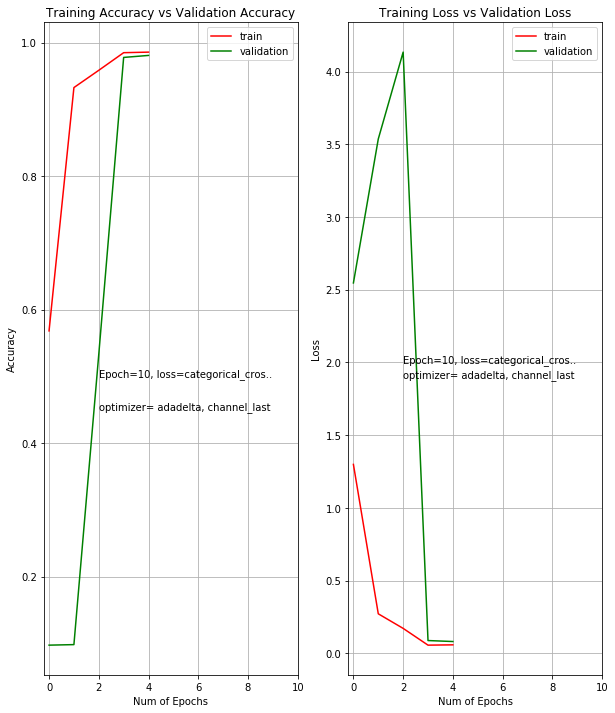

In [27]:
#Graficas de los valores entrenamiento 


fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 12))

ax0.plot(history.history['acc'],'r')  
ax0.plot(history.history['val_acc'],'g')  
ax0.set_xticks(np.arange(0, 11, 2.0))  
ax0.grid(True)
#ax0.set_rcParams['figure.figsize'] = (8, 6)  
ax0.set_xlabel("Num of Epochs")  
ax0.set_ylabel("Accuracy")  
ax0.set_title("Training Accuracy vs Validation Accuracy")  
ax0.legend(['train','validation'])
ax0.text(2, 0.5, r'Epoch=10, loss=categorical_cros..')
ax0.text(2, 0.45, r'optimizer= adadelta, channel_last')
#plt.savefig('Training_validation_acc_E10_adadelta')


#plt.figure(1)  
ax1.plot(history.history['loss'],'r')  
ax1.plot(history.history['val_loss'],'g')  
ax1.set_xticks(np.arange(0, 11, 2.0))  
ax1.grid(True)
#ax1.rcParams['figure.figsize'] = (8, 6)  
ax1.set_xlabel("Num of Epochs")  
ax1.set_ylabel("Loss")  
ax1.set_title("Training Loss vs Validation Loss")  
ax1.legend(['train','validation'])
ax1.text(2, 2, r'Epoch=10, loss=categorical_cros..')
ax1.text(2, 1.9, r'optimizer= adadelta, channel_last')

plt.savefig('Training_validation_E10_adadelta_mxnet.png')



"""
plt.figure(0)  
plt.plot(history.history['acc'],'r')  
plt.plot(history.history['val_acc'],'g')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Accuracy")  
plt.title("Training Accuracy vs Validation Accuracy")  
plt.legend(['train','validation'])


plt.figure(1)  
plt.plot(history.history['loss'],'r')  
plt.plot(history.history['val_loss'],'g')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Loss")  
plt.title("Training Loss vs Validation Loss")  
plt.legend(['train','validation'])
"""

Para mxnet chanels_last, (10 epoch), batch_size = 500

[3.145621380615234, 0.611, 0.0007847246416844428]


epocas 10

optimizer = adam 

[0.0642561407526955, 0.9838999956846237, 4.543997190467053e-05]


epocas 10

optimizer = adam 

[0.06471072004642338, 0.9819999903440475, 5.327082694748242e-05]

epocas 10

optimizer = adadelta


[0.02706918649491854, 0.9918000072240829, 1.9937261066615973e-05]


Notas !
Con adadelta en el segundo paso del entrenamiento ya está en accu = 0.9 
